### **Medical Urgency Classification**
This notebook demonstrates an LLM-based model for classifying levels of medical urgency based on free-text descriptions of patient symptoms.

**Loading the dataset:**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hossamahmedaly/patient-priority-classification")

print("Path to dataset files:", path)

100%|██████████| 141k/141k [00:00<00:00, 28.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hossamahmedaly/patient-priority-classification/versions/1


In [ ]:
import os
print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['patient_priority.csv']


## **EDA**

Step 1 - Basic analysis of the data set: checking the type of variables, data shape, descriptive statistics:

In [ ]:
import pandas as pd

df = pd.read_csv("patient_priority.csv")
df.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [ ]:
# Checking the Dataset Shape
print("Dataset shape:", df.shape)

Dataset shape: (6962, 18)


In [ ]:
# Finding variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6962 non-null   int64  
 1   age                6962 non-null   float64
 2   gender             6961 non-null   float64
 3   chest pain type    6962 non-null   float64
 4   blood pressure     6962 non-null   float64
 5   cholesterol        6962 non-null   float64
 6   max heart rate     6962 non-null   float64
 7   exercise angina    6962 non-null   float64
 8   plasma glucose     6962 non-null   float64
 9   skin_thickness     6962 non-null   float64
 10  insulin            6962 non-null   float64
 11  bmi                6962 non-null   float64
 12  diabetes_pedigree  6962 non-null   float64
 13  hypertension       6962 non-null   float64
 14  heart_disease      6962 non-null   float64
 15  Residence_type     6962 non-null   object 
 16  smoking_status     6962 

In [ ]:
# Basic statistics for numeric columns
df.describe()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.000000,6962.000000,6961.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000
mean,2011.954180,57.450014,0.531964,0.529015,109.629991,184.711290,163.502442,0.061764,98.394283,56.813416,111.091640,27.190908,0.467386,0.071531,0.039500
std,1560.966466,11.904948,0.499013,1.253791,21.534852,32.010359,15.458693,0.240743,28.598084,22.889316,17.470033,7.362886,0.102663,0.257729,0.194796
min,0.000000,28.000000,0.000000,0.000000,60.000000,150.000000,138.000000,0.000000,55.120000,21.000000,81.000000,10.300000,0.078000,0.000000,0.000000
25%,604.000000,48.000000,0.000000,0.000000,92.000000,164.000000,150.000000,0.000000,78.707500,36.000000,97.000000,21.800000,0.467386,0.000000,0.000000
50%,1628.500000,56.000000,1.000000,0.000000,111.000000,179.000000,163.000000,0.000000,93.000000,55.000000,111.000000,26.200000,0.467386,0.000000,0.000000
75%,3368.750000,66.000000,1.000000,0.000000,127.000000,192.000000,177.000000,0.000000,111.632500,77.000000,125.000000,31.000000,0.467386,0.000000,0.000000
max,5109.000000,82.000000,1.000000,4.000000,165.000000,294.000000,202.000000,1.000000,199.000000,99.000000,171.000000,66.800000,2.420000,1.000000,1.000000


In [ ]:
print(df['Residence_type'].value_counts())

Residence_type
Urban    4449
Rural    2513
Name: count, dtype: int64


Explanation about binary values ​​in the following variables:

* **Gender**: 0 = female, 1 = male

* **chest pain type**:

| Value | Description |
|-------|-------------|
| `0`   | **Unknown or missing** – No chest pain data recorded |
| `1`   | **Typical angina** – Classic chest pain, consistent with ischemia (lack of oxygen to the heart) |
| `2`   | **Atypical angina** – Non-classical chest pain, not entirely consistent with cardiac symptoms |
| `3`   | **Non-anginal pain** – Pain not related to the heart, usually from another source (e.g., muscular) |
| `4`   | **Asymptomatic** – No pain at all, but other cardiac abnormalities are present |

* **exercise angina**: 0 = No angina during exertion, 1 = Have angina during exercise

* **hypertension**: 0 = The patient does not have hypertension (normotensive), 1 = The patient has a diagnosis of hypertension.

* **heart_disease**: 0 = Patient has no known heart disease, 1 = Patient has pre-existing (diagnosed) heart disease.

Step 2 - Checking for duplicate rows and missing values:

In [ ]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for missing values

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0             0
age                    0
gender                 1
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64


Step 3: Univariate Analysis - Examining the distribution of the variables

For numerical variables - **Histogram**

For Categorical variables - **Bar plot**

Univariate Analysis: Numeric Features 

Histogram for: age


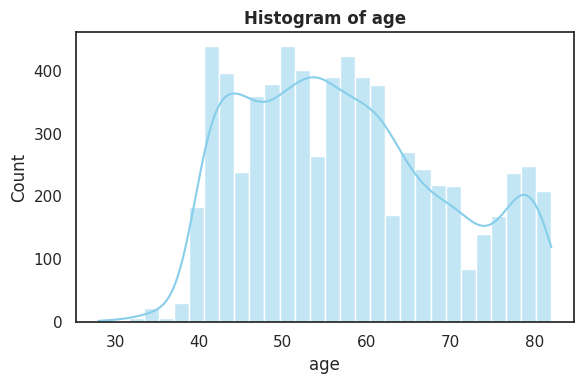

----------------------------------------

Histogram for: gender


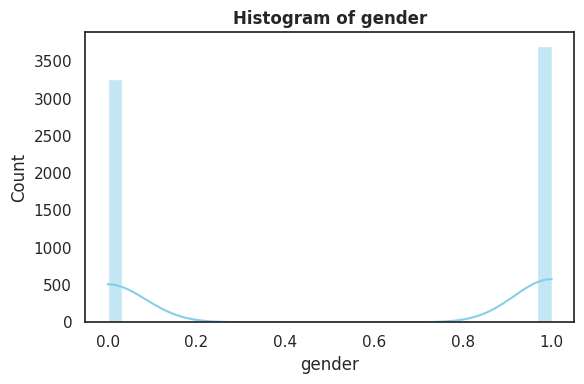

----------------------------------------

Histogram for: chest pain type


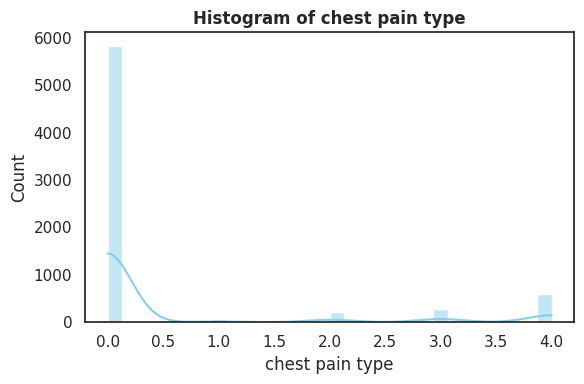

----------------------------------------

Histogram for: blood pressure


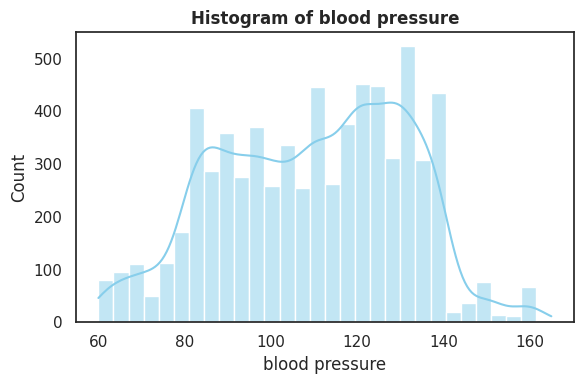

----------------------------------------

Histogram for: cholesterol


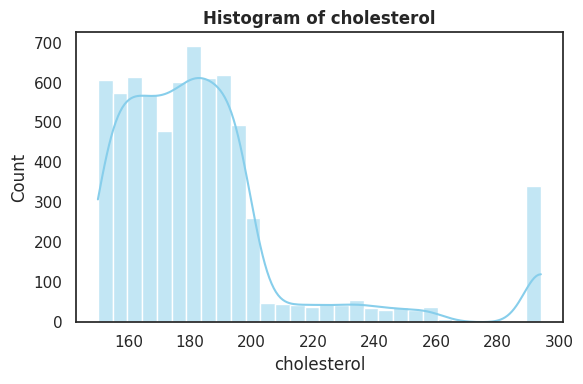

----------------------------------------

Histogram for: max heart rate


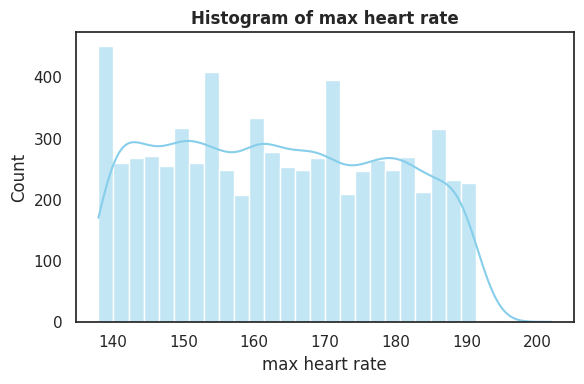

----------------------------------------

Histogram for: exercise angina


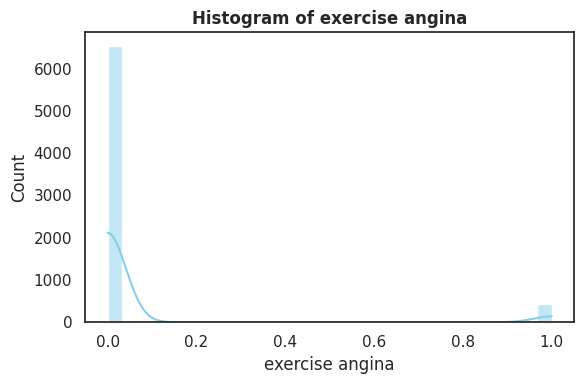

----------------------------------------

Histogram for: plasma glucose


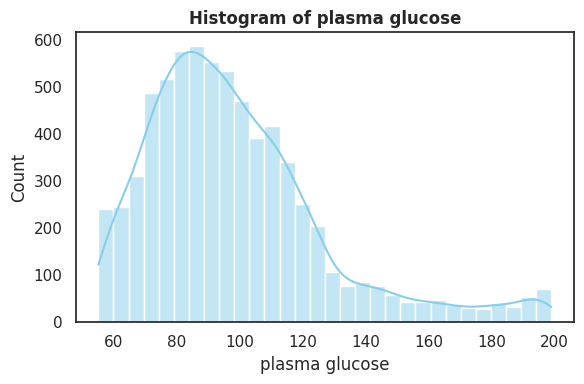

----------------------------------------

Histogram for: skin_thickness


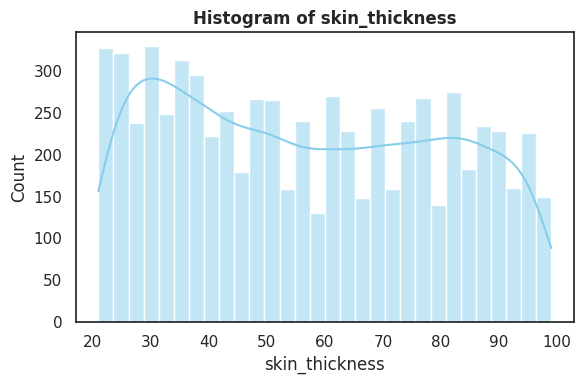

----------------------------------------

Histogram for: insulin


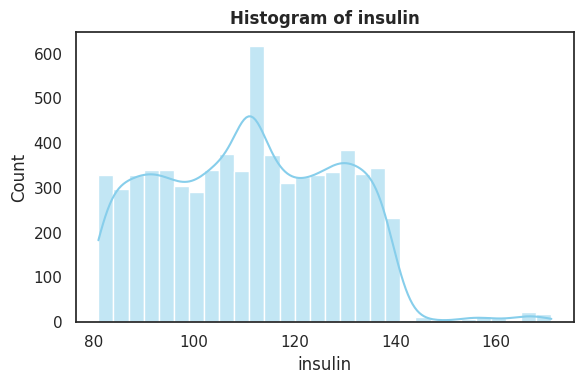

----------------------------------------

Histogram for: bmi


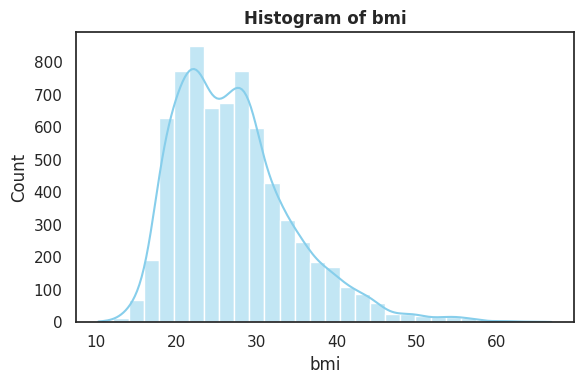

----------------------------------------

Histogram for: diabetes_pedigree


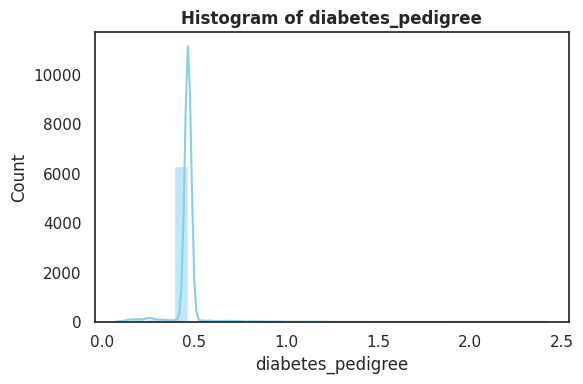

----------------------------------------

Histogram for: hypertension


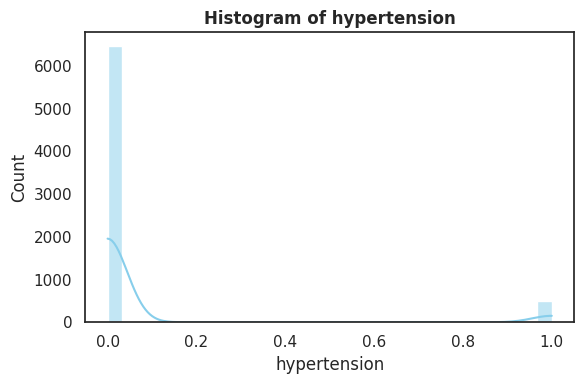

----------------------------------------

Histogram for: heart_disease


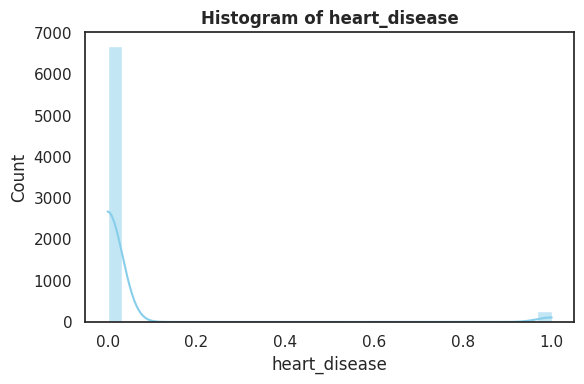

----------------------------------------



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style without grid
sns.set(style="white")
plt.rcParams["figure.figsize"] = (6, 4)

# Numeric Variables:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("Unnamed: 0")

print("Univariate Analysis: Numeric Features \n")

for col in numeric_cols:
    print(f"Histogram for: {col}")

    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.grid(False)
    plt.title(f"Histogram of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    print("-" * 40 + "\n")  # Spacer between plots

Univariate Analysis: Categorical Features
Residence_type
Urban    4449
Rural    2513
Name: count, dtype: int64


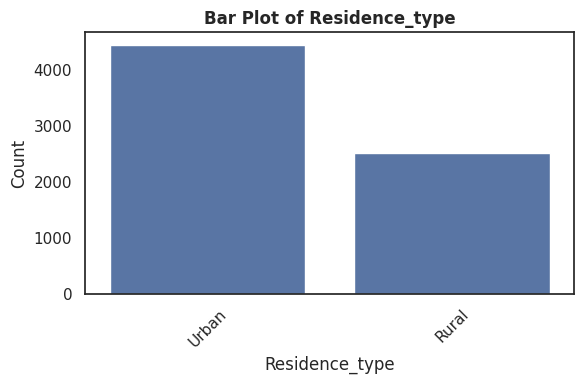

smoking_status
never smoked       3745
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


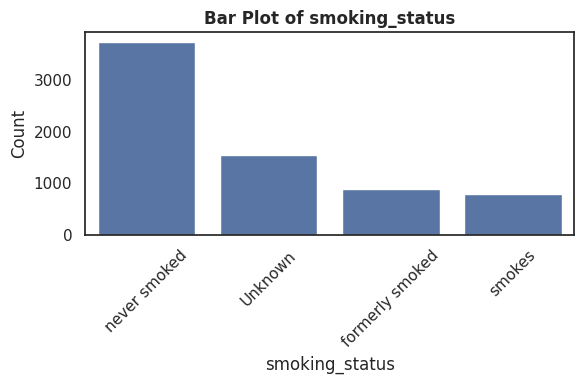

triage
yellow    5637
green      440
orange     346
red        129
Name: count, dtype: int64


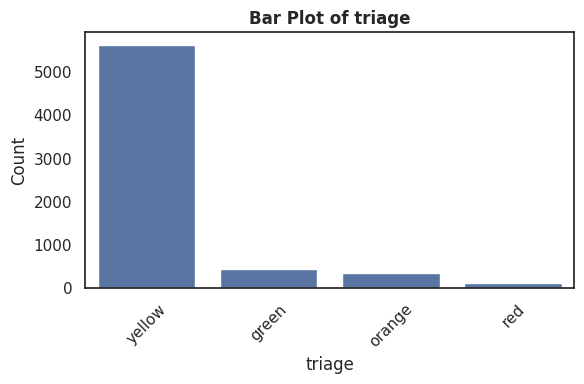

In [ ]:
# Categorical Variables

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

print("Univariate Analysis: Categorical Features")

for col in categorical_cols:
  print(df[col].value_counts())

    # Bar plot
  plt.figure(figsize=(6, 4))
  sns.countplot(x=col, data=df, order=df[col].value_counts().index)
  plt.title(f"Bar Plot of {col}", fontsize=12, fontweight='bold')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
print(categorical_cols)

Index(['Residence_type', 'smoking_status', 'triage'], dtype='object')


In [ ]:
print(numeric_cols)

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease'],
      dtype='object')


Step 4: Calculate correlations and display by Correlation Matrix Heatmap

In [ ]:
# Convert 'triage' variable to numeric

triage_map = {
    "green": 0,
    "yellow": 1,
    "orange": 2,
    "red": 3
}
df["triage_encoded"] = df["triage"].map(triage_map)

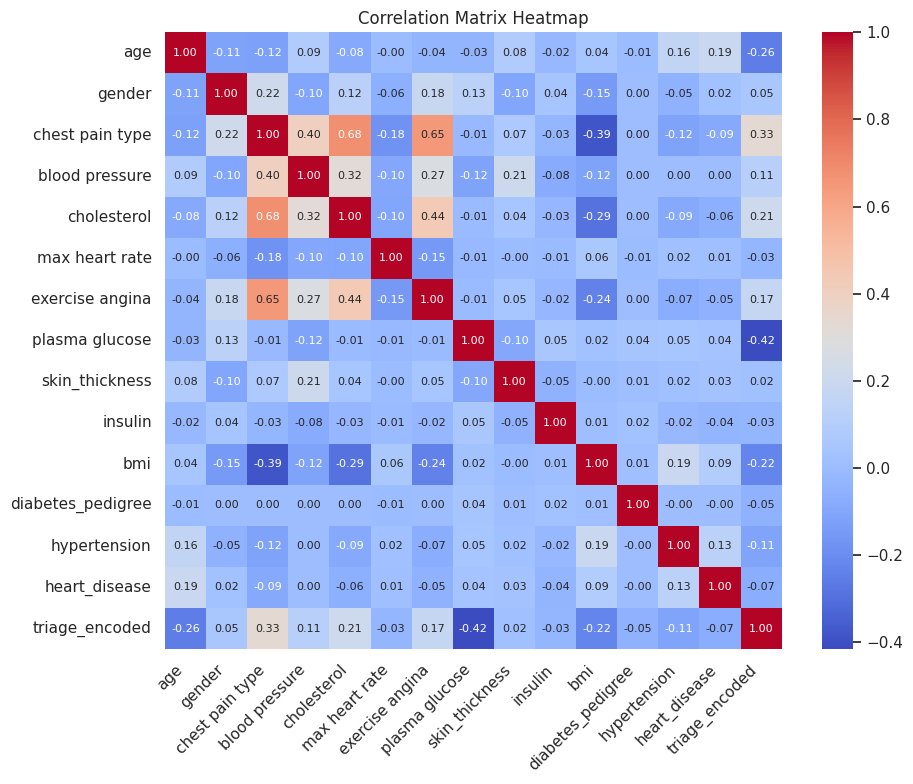

In [ ]:
# Creating Correlation Matrix:

# Compute correlation matrix for numeric columns only
correlation_matrix = df.corr(numeric_only=True).drop("Unnamed: 0", axis=0).drop("Unnamed: 0", axis=1)

# Heatmap with smaller figure size and smaller font
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    annot_kws={"size": 8}
)

plt.title("Correlation Matrix Heatmap", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Prevent label overlap
plt.show()

In [ ]:
df.corr(numeric_only=True)["triage_encoded"].sort_values(ascending=False)

,triage_encoded
triage_encoded,1.000000
chest pain type,0.332215
cholesterol,0.209017
exercise angina,0.172486
blood pressure,0.111255
gender,0.051889
skin_thickness,0.019876
insulin,-0.030617
max heart rate,-0.030622
diabetes_pedigree,-0.047285


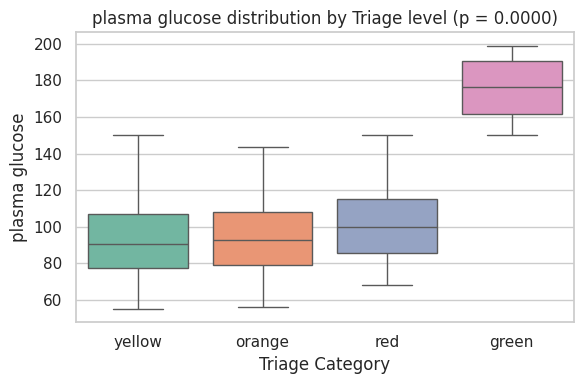

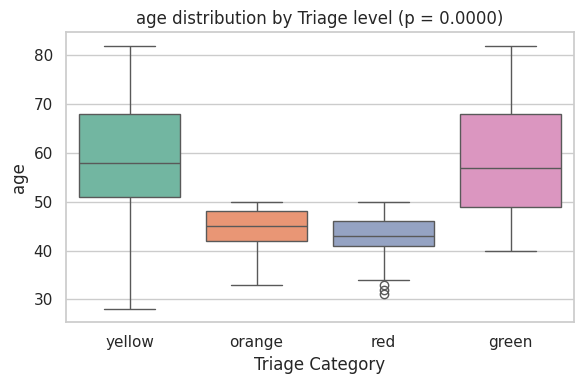

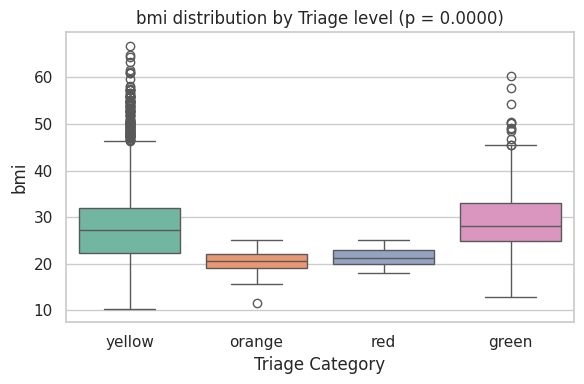

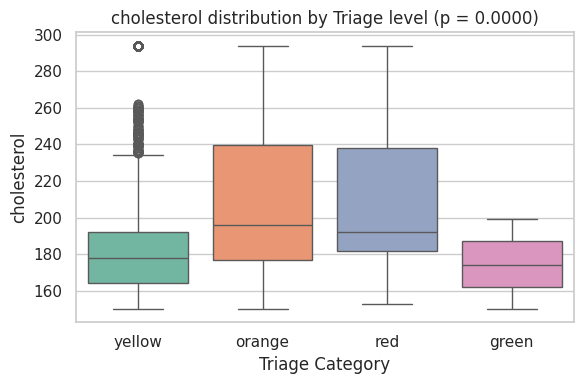

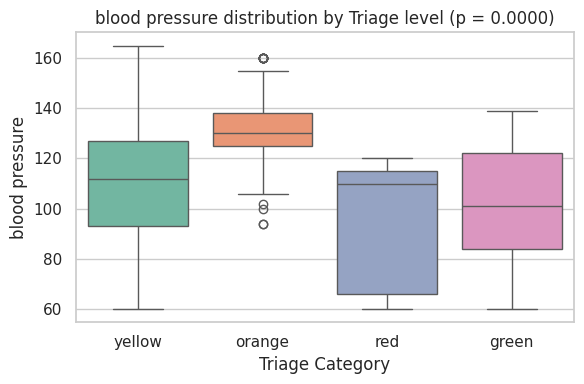

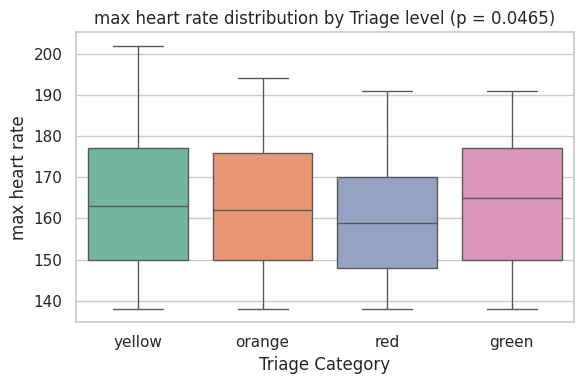

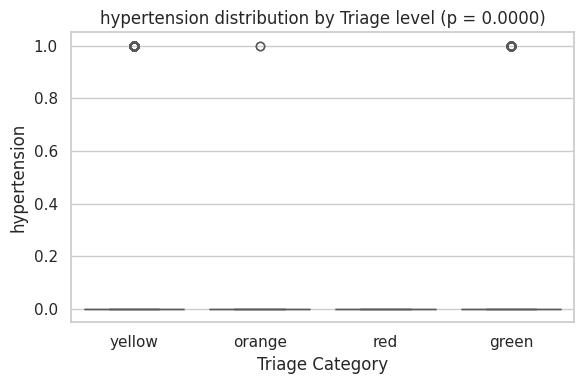

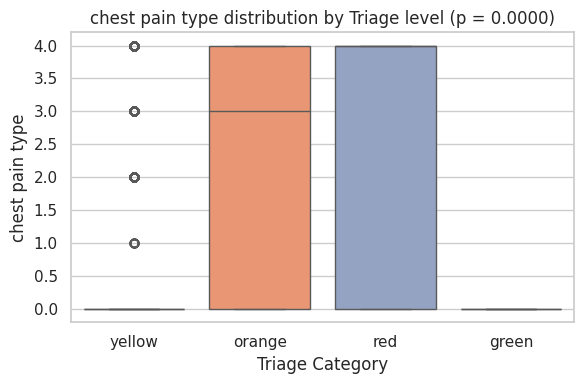

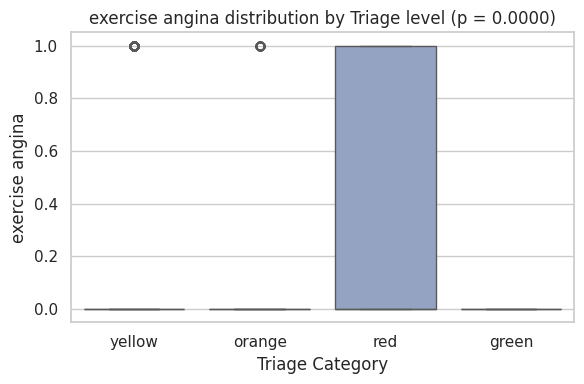

In [ ]:
# Visualizing Triage Correlation with Numerical Features using Boxplots and Kruskal-Wallis

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Select features to plot
features_to_plot = ['plasma glucose', 'age', 'bmi', 'cholesterol',
                    'blood pressure', 'max heart rate', 'hypertension',
                    'chest pain type', 'exercise angina']

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)

# Boxplot per feature with Kruskal-Wallis p-value in title
for feature in features_to_plot:
    # Drop missing values
    df_valid = df.dropna(subset=['triage', feature])

    # Group values by triage
    groups = df_valid.groupby('triage')[feature].apply(list)

    # Compute Kruskal-Wallis test
    if len(groups) >= 2:  # at least 2 groups needed
        stat, p = kruskal(*groups)
        p_text = f" (p = {p:.4f})"
    else:
        p_text = " (insufficient groups)"

    # Plot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='triage', y=feature, data=df_valid, palette='Set2',
                hue='triage', legend=False)  # suppress FutureWarning
    plt.title(f'{feature} distribution by Triage level{p_text}')
    plt.xlabel('Triage Category')
    plt.ylabel(feature)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

### Insights: Triage Level vs Numerical Features -  p-values ≤ 0.05, indicating statistically significant

1. **Plasma Glucose:**
Patients in the **green** triage category have **much higher** glucose levels than other groups.
Indicates that **high glucose is not necessarily linked to emergency** possibly reflects chronic conditions (e.g., diabetes).

2. **Age**:
The **yellow** triage group includes the **oldest** patients on average, while **red/orange** tend to be **younger**.
Suggests that **age alone is not a direct indicator** of triage urgency.

3. **BMI:** **Higher BMI** values are observed in **green/yellow** groups.
Suggests obesity is more common among **less urgent** patients.

4. **Cholesterol:** **Red/orange/yellow** groups show **higher cholesterol** levels.
May be associated with urgent cardiac conditions but with **high variability**.

5. **Blood Pressure:** **Orange** group shows highest median blood pressure.
BP may contribute to urgency in some patients (e.g., chest pain), but it varies widely.

6. **Max Heart Rate:** Slight but statistically significant differences between groups. Max HR is **not a strong standalone indicator** of triage level.

7. **Hypertension:** Most patients in **all triage categories** do **not** have hypertension (value = 0). Suggests that chronic hypertension alone **does not determine triage urgency**.

8. **Chest Pain Type:** **Red/orange** groups contain more patients with **anginal pain types (3–4)**.
Strong link between **chest pain and emergency triage**.

9. **Exercise Angina:** Only the **red** group shows presence of exercise-induced angina.A powerful predictor of **high urgency** – almost exclusive to critical triage.


Step 5: outliers detection using IQR method and Boxplot graphs

age: 0 outliers



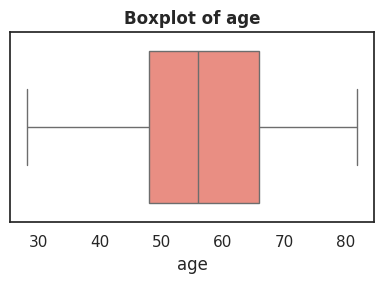

----------------------------------------

gender: 0 outliers



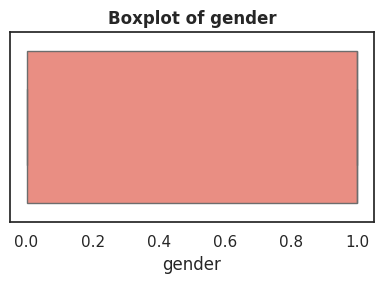

----------------------------------------

chest pain type: 1139 outliers



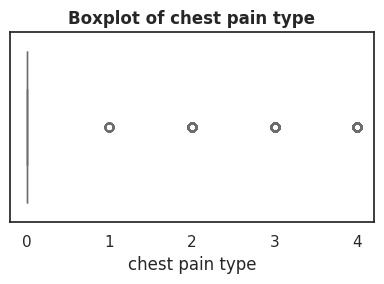

----------------------------------------

blood pressure: 0 outliers



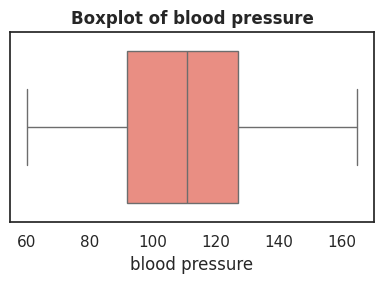

----------------------------------------

cholesterol: 546 outliers



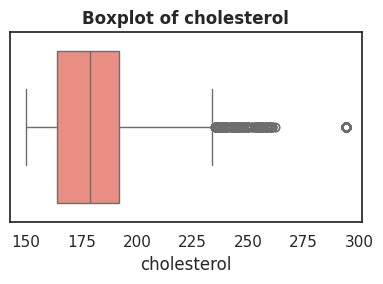

----------------------------------------

max heart rate: 0 outliers



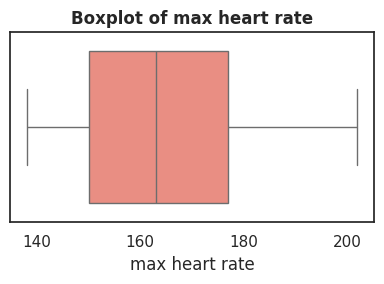

----------------------------------------

exercise angina: 430 outliers



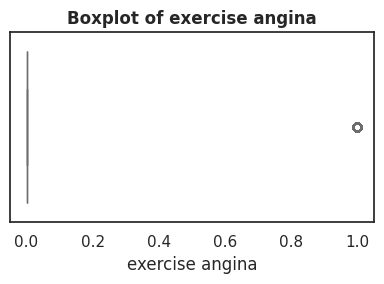

----------------------------------------

plasma glucose: 333 outliers



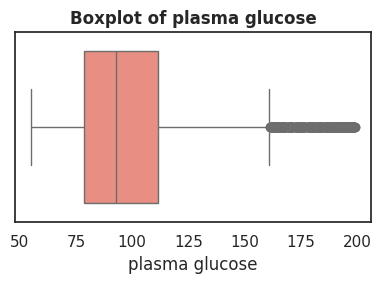

----------------------------------------

skin_thickness: 0 outliers



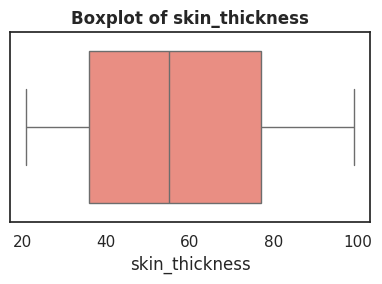

----------------------------------------

insulin: 18 outliers



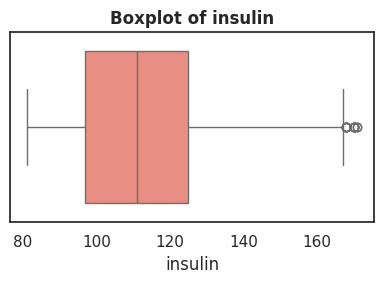

----------------------------------------

bmi: 164 outliers



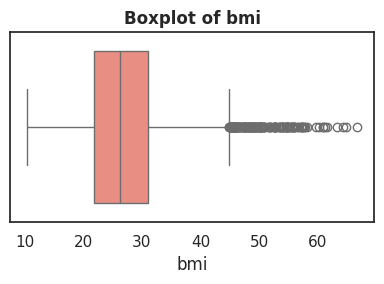

----------------------------------------

diabetes_pedigree: 715 outliers



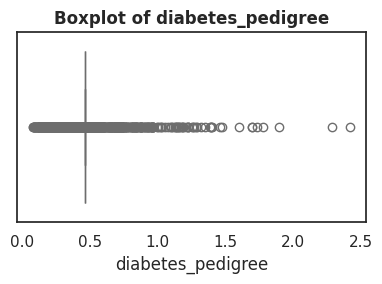

----------------------------------------

hypertension: 498 outliers



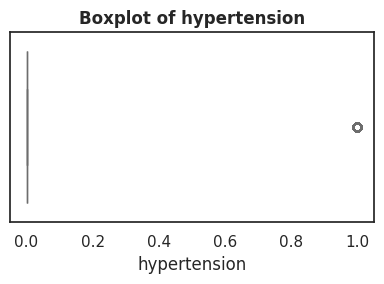

----------------------------------------

heart_disease: 275 outliers



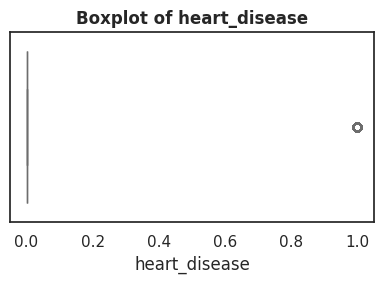

----------------------------------------

triage_encoded: 915 outliers



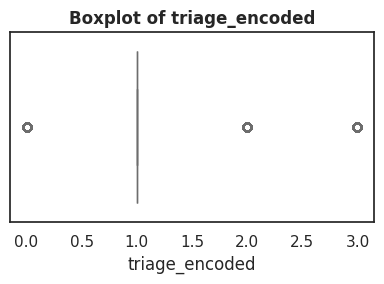

----------------------------------------



In [ ]:
# Set clean style
sns.set(style="white")
plt.rcParams["figure.figsize"] = (4, 3)

# Select numeric columns only (excluding index column)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("Unnamed: 0")

# Dictionary to store the number of outliers in each variable
outlier_summary = {}

for col in numeric_cols:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    n_outliers = outliers.shape[0]
    outlier_summary[col] = n_outliers

    # Print summary + line break
    print(f"{col}: {n_outliers} outliers\n")

    # Draw boxplot
    plt.figure()
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # Add a blank line in output between graphs
    print("-" * 40 + "\n")